In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import differential_evolution
import pandas as pd
import matplotlib.pyplot as plt

statelist=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"]


Political_affiliation=["R","R","D","R","D","D","D","D","R","D",
       "D","R","D","R","R","R","R","R","D","D",
       "D","D","D","R","R","R","R","D","D","D",
       "D","D","R","R","R","R","R","D","D","R",
       "R","R","R","R","D","D","D","R","D","R"]

statecode=['AL','AK','AZ','AR','CA', 'CO','CT',
           'DE','FL','GA','HI','ID','IL','IN',
           'IA','KS','KY','LA','ME','MD','MA',
           'MI','MN','MS','MO','MT','NE','NV',
           'NH','NJ','NM','NY','NC','ND','OH',
           'OK', 'OR','PA','RI','SC','SD','TN',
           'TX','UT','VT','VA','WA','WV','WI','WY']

#official vaccinated frequency reported by USA government
final_vaccinated_official=[0.6328,0.7064,0.7408,0.6735,0.8297,0.8009,0.9663,0.8402,0.8004
      ,0.6596,0.8812000000000001,0.6217,0.7628,0.6252,0.6835,0.7299,
      0.6662,0.6146,0.9161,0.8731,0.9954,0.6738,0.7559,0.6004,0.6667,
      0.6581,0.7077,0.76,0.84,0.9123,0.8885,0.9093,0.856,0.6605,0.6364
      ,0.7171,0.7848,0.8593,0.905,0.6828,0.7757,0.6272,0.7394,0.7249
      ,0.9436,0.8675,0.8169,0.655,0.7231,0.5853]

#uVAR model
def model (data,time, β,α,γ,A_r,R_r): 
    A,R,V=data
    dAdt=-1*(α+γ*V)*(A-A_r)+β*(A+V)*(R-R_r)
    dRdt=-1*β*(A+V)*(R-R_r)
    dVdt=1*(α+γ*V)*(A-A_r)
    return [dAdt,dRdt,dVdt]

# Loss function as MSE 
def loss(parameters, data_0, time, data): 
    β,α,γ,A_r,R_r= parameters
    data_predict = odeint(model, data_0, time, args=( β,α,γ,A_r,R_r))
    A_predict = data_predict[:, 0]
    R_predict = data_predict[:, 1]
    V_predict = data_predict[:, 2]
    return np.sum((A_predict - data[0,:]) ** 2+(R_predict - data[1,:]) ** 2+(V_predict - data[2,:]) ** 2)

parameters_model=np.zeros([len(statelist),5])
final_vaccinated_survey=np.zeros([len(statelist)])
final_vaccinated_survey=np.zeros([len(statelist)])
for i in range(len(statelist)):
    df = pd.read_csv(f'weekly/{state}.csv')  #Location of weekly aggrigated data
    time=np.arange(0, len(df['Dates']), 1)
    Bounds=((-1,1),(0,1),(0,1),(0,1),(0,1))  #bounds for parameters (β,α,γ,A_r,R_r)
    data_0=list(df[["Accepted","Refused","Vaccinated"]].iloc[0])  #initial condition
    result = differential_evolution(loss, bounds=Bounds,args=(data_0, time,(df[["Accepted","Refused","Vaccinated"]].to_numpy()).T))  #find optimizes parameters
    best_params = result.x
    parameters_model[i,:]=best_params
    model_data=(odeint(model, data_0, time, args=(best_params[0] ,best_params[1],best_params[2],best_params[3],best_params[4]))).T  #find the fited curve based on optimized parameters.
    np.savetxt(f'model/{state}.txt',model_data)
    final_vaccinated_survey=np.average(df[["Vaccinated"]].to_numpy()[-10:])
    final_vaccinated_model=model_data[2,-1]


parameters= pd.DataFrame()
parameters["State"]=statelist
parameters["State Code"]=statecode
parameters["Political_affiliation"]=listp
parameters["β"]=parameters_model[:,0]
parameters["α"]=parameters_model[:,1]
parameters["γ"]=parameters_model[:,2]
parameters["A_r"]=parameters_model[:,3]
parameters["R_r"]=parameters_model[:,4]
parameters["Final v SU"]=final_vaccinated_survey
parameters["Final v Mo"]=final_vaccinated_model
parameters["Final v re"]=final_vaccinated_official
parameters.to_csv("parameter.csv")    #all necessary data for model parameters and final frequency of vaccinated data is in this

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


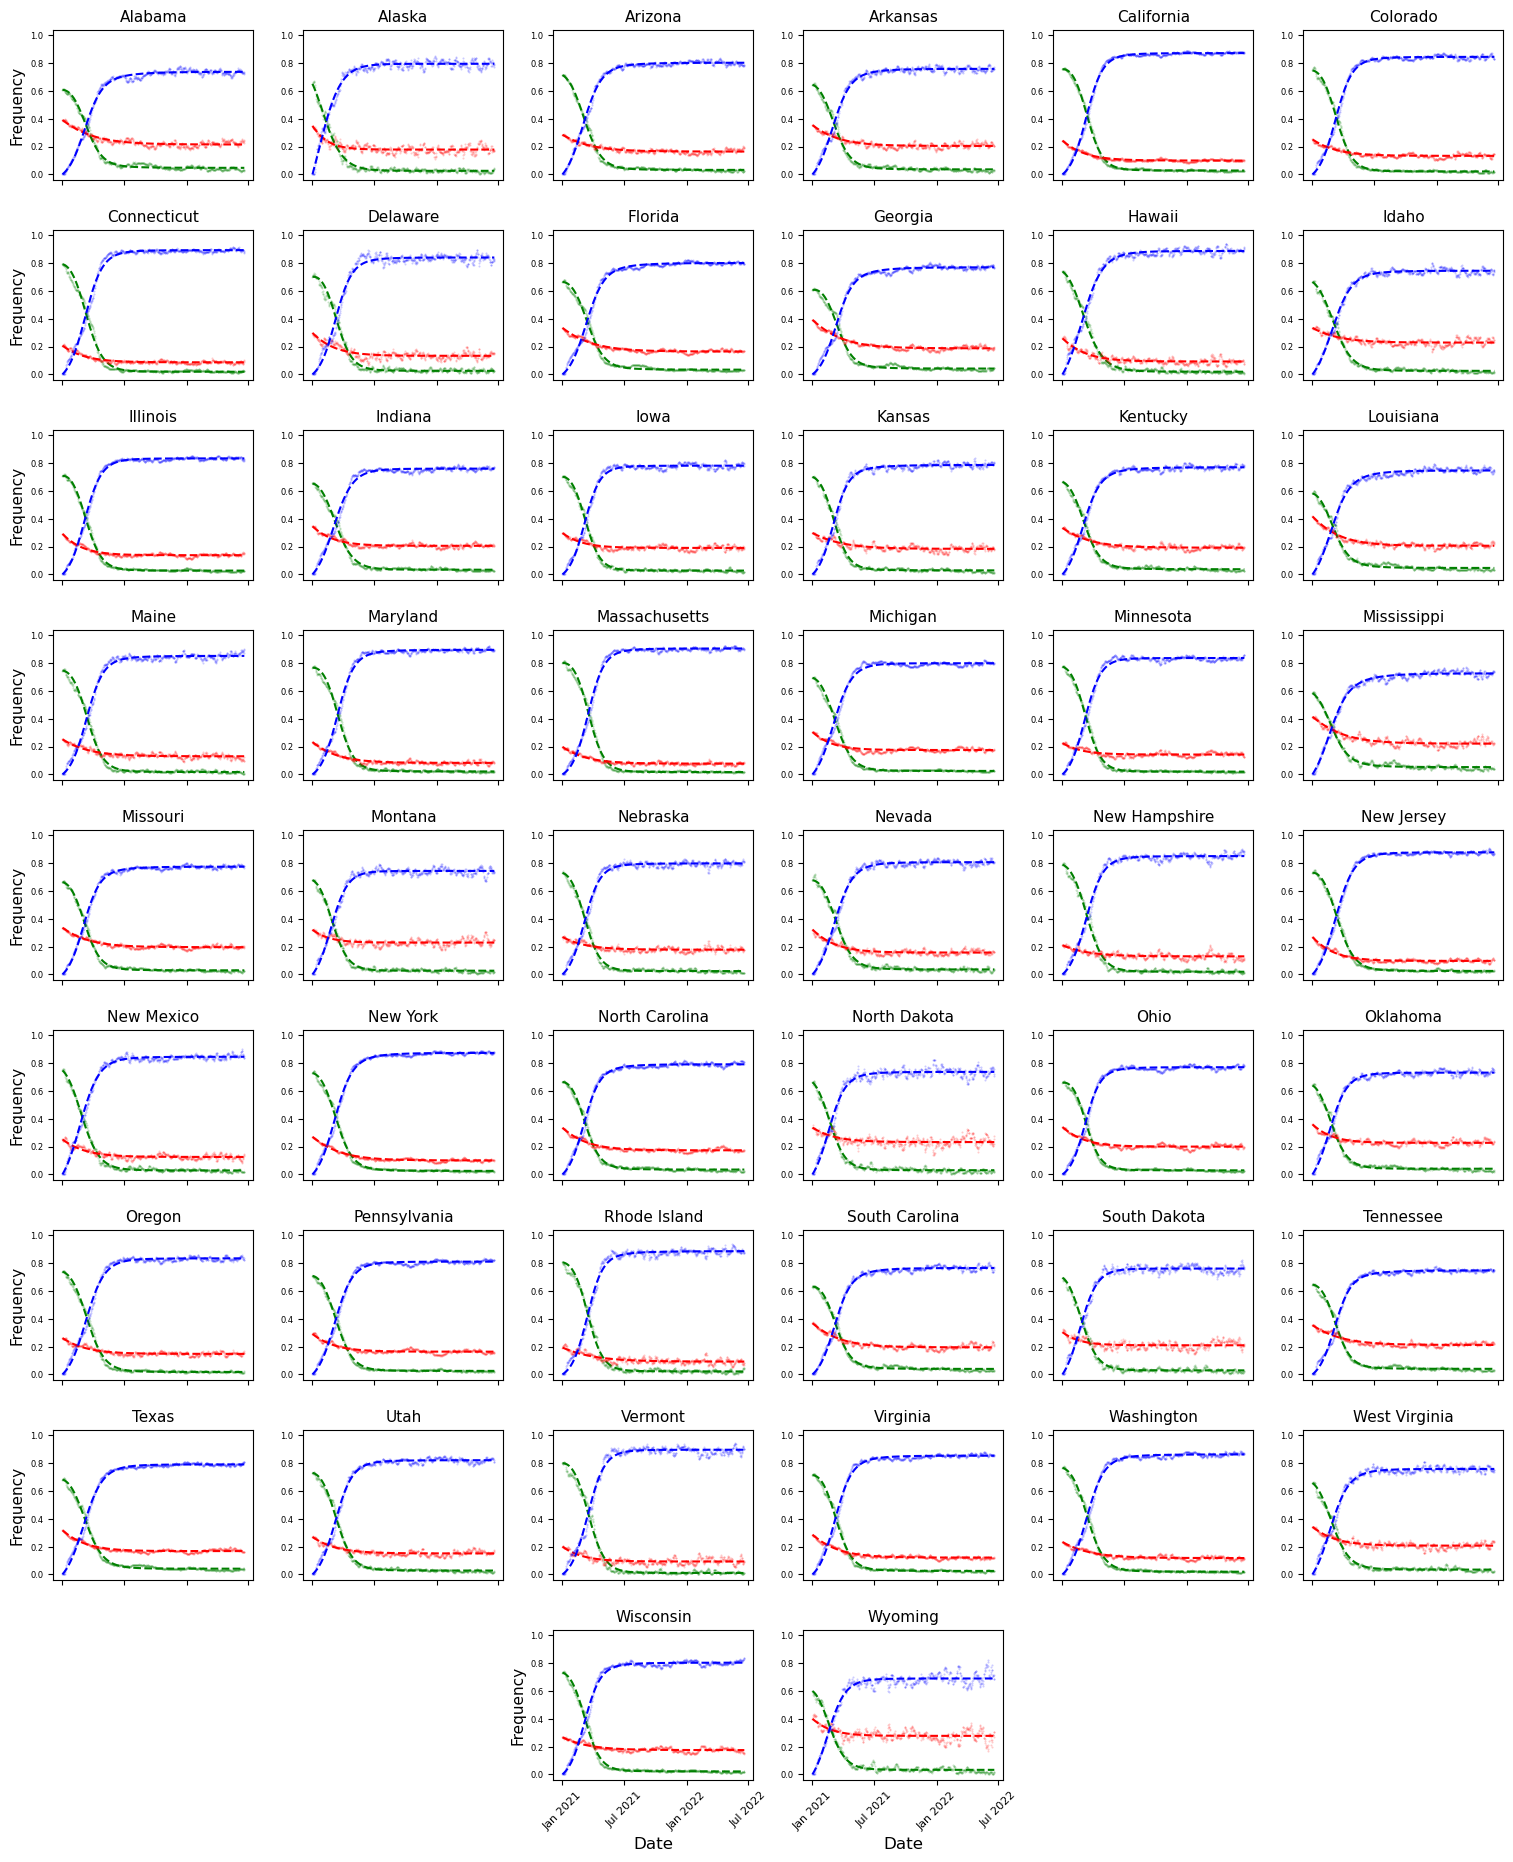

In [12]:
#Plot all states model and survey time series
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import differential_evolution
import pandas as pd
import matplotlib.pyplot as plt
statelist=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado",
    "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho",
    "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon",
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"]

mf=1
lf=1.5
titf=11
xlf=11
fig=plt.figure(figsize=(5,5))
ii=0
jj=0
for state in statelist:
    print(state)
    df = pd.read_csv(f'weekly/{state}.csv') 
    model_data=np.loadtxt(f'model/{state}.txt') 
    rect_1=[ii*.5,-jj*0.4,.4,.3]
    if jj==8:
        rect_1=[(ii+2)*.5,-jj*0.4,.4,.3]
    ax1=fig.add_axes(rect_1,facecolor=(1,1,1))
    plt.plot(df["Accepted"],".g",markersize=mf,alpha=0.2)
    plt.plot(model_data[0,:],"--g",linewidth=lf)
    plt.plot(df["Refused"],".r",markersize=mf,alpha=0.2)
    plt.plot(model_data[1,:],"--r",linewidth=lf)
    plt.plot(df["Vaccinated"],".b",markersize=mf,alpha=0.2)
    plt.plot(model_data[2,:],"--b",linewidth=lf)
    plt.ylim(-0.04,1.04)
    labels=["","","",""]
    plt.xticks([0,181,365,546], labels,fontsize=15 )
    labels=["0.0","0.2","0.4","0.6","0.8","1.0"]
    plt.yticks([0,.2,.4,.6,.8,1], labels,fontsize=6 )
   # plt.grid()
    tit=state
    plt.title(tit,fontsize=titf)
    if jj==8:
        plt.xlabel("Date",fontsize=xlf+1)
        labels=["Jan 2021","Jul 2021","Jan 2022","Jul 2022"]
        plt.xticks([0,181,365,546], labels,fontsize=8,rotation=45 )
    if ii==0:
         plt.ylabel("Frequency",fontsize=xlf)
    ii+=1
    if ii==6:
        ii=0
        jj+=1
plt.savefig("fitVAR_all_states.jpg", bbox_inches='tight', dpi=500) 

California
Florida
Texas
Pennsylvania


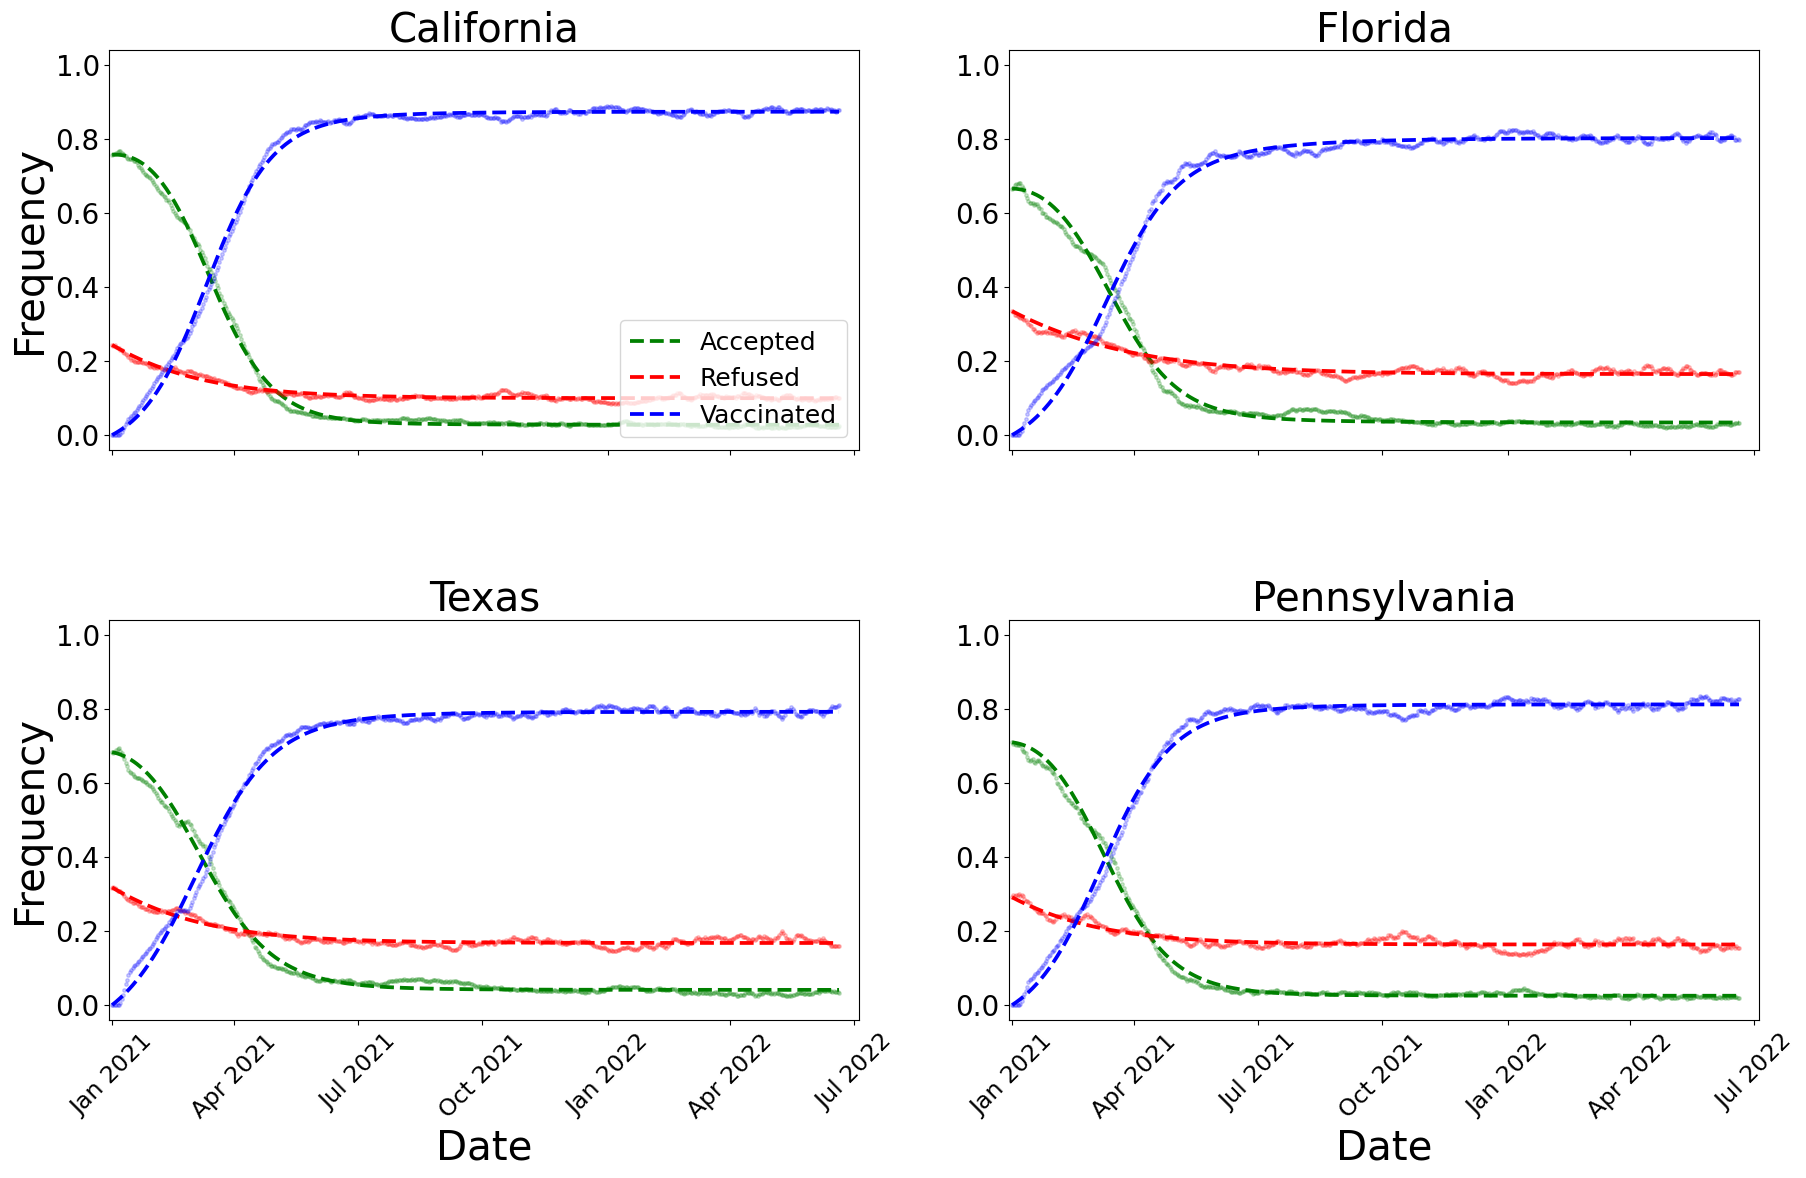

In [10]:
statelist=[ "California","Florida","Texas","Pennsylvania"]
mf=5
lf=2.7
titf=21
xlf=21
i=0
fig=plt.figure(figsize=(15,10))
for state in statelist:
    print(state)
    df = pd.read_csv(f'weekly/{state}.csv') 
    time=np.arange(0, len(df['Dates']), 1)
    model_data=np.loadtxt(f'model/{state}.txt') 
    if i==0:
        rect_1=[0,0,.5,.4]
    if i==1:
        rect_1=[0.6,0,.5,.4]
    if i==2:
        rect_1=[0,-.57,.5,.4]
    if i==3:
        rect_1=[0.6,-.57,.5,.4]
    ax1=fig.add_axes(rect_1,facecolor=(1,1,1))
    plt.plot(df["Accepted"],".g",markersize=mf,alpha=0.2)
    plt.plot(model_data[0,:],"--g",linewidth=lf,label="Accepted")
    plt.plot(df["Refused"],".r",markersize=mf,alpha=0.2)
    plt.plot(model_data[1,:],"--r",linewidth=lf,label="Refused")
    plt.plot(df["Vaccinated"],".b",markersize=mf,alpha=0.2)
    plt.plot(model_data[2,:],"--b",linewidth=lf,label="Vaccinated")
    if i==0:
        plt.legend(loc=4,fontsize=18)
    plt.ylim(-0.04,1.04)
    plt.xlim(-2,550)
    labels=["0.0","0.2","0.4","0.6","0.8","1.0"]
    plt.yticks([0,.2,.4,.6,.8,1], labels,fontsize=20 )
    #plt.grid(linestyle='--', linewidth=2)
    tit=state
    plt.title(tit,fontsize=titf+8)

    if i==0:
        plt.ylabel("Frequency",fontsize=xlf+8)
        labels=["","","","","","",""]
        plt.xticks([0,90,181,272,365,455,546], labels,fontsize=17,rotation=45 )
    if i==1:
        labels=["","","","","","",""]
        plt.xticks([0,90,181,272,365,455,546], labels,fontsize=17,rotation=45 )
    if i==2:
        plt.xlabel("Date",fontsize=xlf+8)
        labels=["Jan 2021","Apr 2021","Jul 2021","Oct 2021","Jan 2022","Apr 2022","Jul 2022"]
        plt.xticks([0,90,181,272,365,455,546], labels,fontsize=17,rotation=45 )
        plt.ylabel("Frequency",fontsize=xlf+8)
    if i==3:
        plt.xlabel("Date",fontsize=xlf+8)
        labels=["Jan 2021","Apr 2021","Jul 2021","Oct 2021","Jan 2022","Apr 2022","Jul 2022"]
        plt.xticks([0,90,181,272,365,455,546], labels,fontsize=17,rotation=45 )
    i+=1
plt.savefig("fitVAR_4_states.jpg", bbox_inches='tight', dpi=500) 

In [ ]:
#plot all model optimized parameters on USA map

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import us
import plotly.graph_objects as go 
import gmaps
from IPython.display import display
from PIL import Image



def plot_heatmap(df, var): 
    # plotting the heatmap by states
    fig = go.Figure(data=go.Choropleth(
        locations=df['State Code'], # Spatial coordinates
        z = df[var].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'emrld',
        colorbar_title = var,
        text = df['State']
    ))

    fig.update_layout(
        title_text = "",
        geo_scope='usa', # limit map scope to USA
    )
    fig.write_image(f"{var}.png",scale=10.0)
    fig.show()
df=pd.read_csv("parameter.csv")
plot_heatmap(df, 'α')  #can change 'α' with other parameters (β,γ,A_r,R_r)